In [1]:
from ucimlrepo import fetch_ucirepo 
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import nb as nb
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# fetch dataset 
dataset = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 

# print(X.sample(1))
# print(np.mean(X.radius1))
# print(y.sample(3))
# X.shape = (569, 30) -> (sample_num, features_num) features has different mean variance
# y.shape = (569, 1)  -> (sample_num, diagnosis) M or B
  
# metadata (information about dataset)
#print(dataset.metadata) 
  
# variable information 
# print(dataset.variables.name[31]) 
# print(len(dataset.variables))

# y.Diagnosis.hist()

In [4]:
set = [X, y]
X = pd.concat(set, axis=1)

<Axes: >

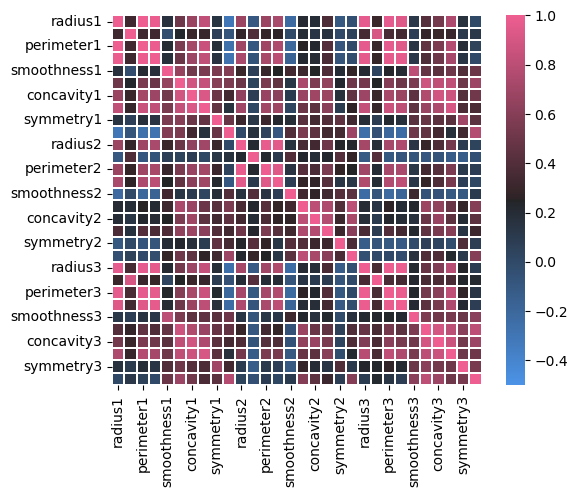

In [5]:
# Correlation matrix
corr = X.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2) 

In [6]:
# Table of input values
X.head(10)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,M


radius1
texture1
area1


<Axes: xlabel='area1', ylabel='Count'>

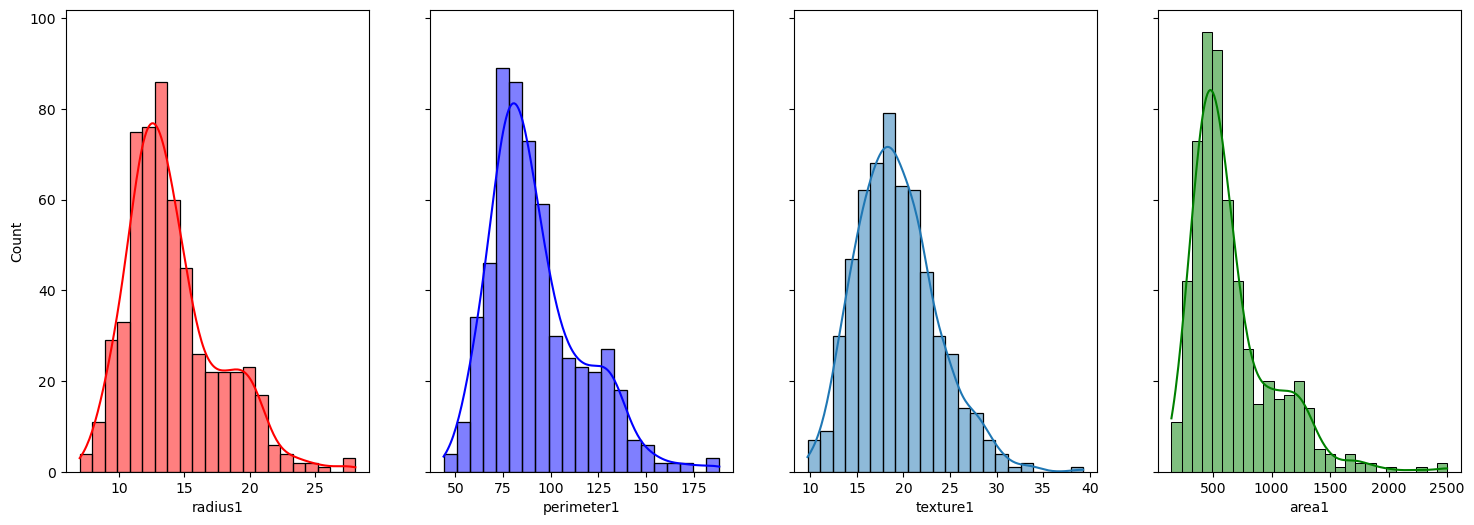

In [7]:
print(dataset.variables.name[2])
print(dataset.variables.name[3])
print(dataset.variables.name[5])

fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)
sns.histplot(X, ax=axes[0], x="radius1", kde=True, color='r')
sns.histplot(X, ax=axes[1], x="perimeter1", kde=True, color='b')
sns.histplot(X, ax=axes[2], x="texture1", kde=True)
sns.histplot(X, ax=axes[3], x="area1", kde=True, color='g')

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.06, random_state=34)
y_train = X_train.Diagnosis
y_train = y_train.to_numpy().reshape(-1, 1)
y_train = np.asarray(y_train, dtype=str)

y_test = X_test.Diagnosis
y_test = y_test.to_numpy().reshape(-1, 1)
y_test= np.asarray(y_test, dtype=str)


In [9]:
# Split data to classes
class_M = X_train[X_train['Diagnosis'] == 'M']
class_B = X_train[X_train['Diagnosis'] == 'B']

In [10]:
# Calculate the means and variances of the features
means = []
variances = []
for i in range (2,len(dataset.variables)):
    means.append(np.mean(X_train[dataset.variables.name[i]]))
    variances.append(np.var(X_train[dataset.variables.name[i]]))
    
means_m = []
variances_m = []
for i in range (2,len(dataset.variables)):
    means_m.append(np.mean(class_M[dataset.variables.name[i]]))
    variances_m.append(np.var(class_M[dataset.variables.name[i]]))

means_b = []
variances_b = []
for i in range (2,len(dataset.variables)):
    means_b.append(np.mean(class_B[dataset.variables.name[i]]))
    variances_b.append(np.var(class_B[dataset.variables.name[i]]))


In [17]:
# Predict
def predict(samples):
    prior_m = len(class_M)/len(X_train)
    prior_b = len(class_B)/len(X_train)

    posterior_m = prior_m
    posterior_b = prior_b

    predictions = []
    for sample in samples:
        #print(sample)
        for i in range (2, len(dataset.variables)): # for all features
            print(dataset.variables.name[i])
            likelihood_m = (1/(np.sqrt(2*np.pi*variances_m[i-2])))*np.exp(-((sample[dataset.variables.name[i]].values[0]-means_m[i-2])**2)/(2*variances_m[i-2]))
            likelihood_b = (1/(np.sqrt(2*np.pi*variances_b[i-2])))*np.exp(-((sample[dataset.variables.name[i]].values[0]-means_b[i-2])**2)/(2*variances_b[i-2]))
            posterior_m = posterior_m * likelihood_m
            posterior_b = posterior_b * likelihood_b

        if(posterior_m > posterior_b):
            predictions.append(0)
        else:
            predictions.append(1)
            
    return predictions
    
#sample = X_test.sample(1) # taking a random sample
#print("Value: ",sample.Diagnosis.values[0])
#
#prior_m = len(class_M)/len(X_train)
#prior_b = len(class_B)/len(X_train)
#
#posterior_m = prior_m
#posterior_b = prior_b
#
#for i in range (2, len(dataset.variables)): # for all features
#    likelihood_m = (1/(np.sqrt(2*np.pi*variances_m[i-2])))*np.exp(-((sample[dataset.variables.name[i]].values[0]-means_m[i-2])**2)/(2*variances_m[i-2]))
#    likelihood_b = (1/(np.sqrt(2*np.pi*variances_b[i-2])))*np.exp(-((sample[dataset.variables.name[i]].values[0]-means_b[i-2])**2)/(2*variances_b[i-2]))
#    posterior_m = posterior_m * likelihood_m
#    posterior_b = posterior_b * likelihood_b
#
#if(posterior_m > posterior_b):
#    print("Prediction: M")
#else:
#    print("Prediction: B")


In [18]:
# Testing Performance 
# Convert y_train to one-hot encoding

Y_test = np.zeros((len(y_train), 2))
for i in range(len(y_train)):
    if y_train[i] == 'M':
        Y_test[i] = 1
    else:
        Y_test[i] = 1

print(X_test)
Y_pred = predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

radius1


TypeError: string indices must be integers, not 'str'

In [ ]:

# Convert y_train to one-hot encoding
encoded_y = np.zeros((len(y_train), 2))
for i in range(len(y_train)):
    if y_train[i] == 'M':
        encoded_y[i, 0] = 1
    else:
        encoded_y[i, 1] = 1


In [ ]:
X_train = X_train.drop(columns=['Diagnosis'])

In [ ]:
# Define model
input_dim = X_train.shape[1]
num_classes = 2

model = nb.NaiveBayes(input_dim, num_classes)


input_dim 30
num_classes 2


In [ ]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
data_x = []
for i in range (2,32):
    data_x.append(X_train[dataset.variables.name[i]].to_numpy())

data_x = np.array(data_x)

In [ ]:
normalized_data = []

for i in range (0,30):
    normalized_data.append(1/variances[i]*np.exp(-((data_x[i]-means[i])**2)/(2*variances[i])))
    #normalized_data.append((data_x[i] - np.mean(data_x[i]))/np.std(data_x[i]))

In [ ]:
x_tensor = torch.tensor(data_x, dtype=torch.float64).t()
print(x_tensor.shape)

y_tensor = torch.tensor(encoded_y, dtype=torch.float64)
print(y_tensor.shape)

torch.Size([534, 30])
torch.Size([534, 2])


In [ ]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 594555.6848
Epoch [20/100], Loss: 556061.3519
Epoch [30/100], Loss: 439634.3019
Epoch [40/100], Loss: 338376.8801
Epoch [50/100], Loss: 270013.6557
Epoch [60/100], Loss: 222420.6269
Epoch [70/100], Loss: 188964.8725
Epoch [80/100], Loss: 162397.0580
Epoch [90/100], Loss: 139070.4570
Epoch [100/100], Loss: 119640.7573


In [ ]:

# Test the model
with torch.no_grad():
    predicted = model.predict(X_test)
    accuracy = (predicted.numpy() == y_test).mean()
    print(f'Test Accuracy: {accuracy:.4f}')